# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from termcolor import colored

## Task 1

In [2]:
# read the iris data into a pandas DataFrame, including column names
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Task 2

In [21]:
# gather basic information
def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(70, '*'))
    print('Observations -------> {}'.format(df.shape[0]))
    print('Features     -------> {}'.format(df.shape[1]))
    print(f"Shape of dataset: {colored(df.shape, 'red')}")
    print(" TYPES OF FEATURES ".center(70, '*'))
    print(df.dtypes,"\n")
    print(" HEAD ".center(70, '*'))
    print("\n",df.head(head),"\n")
    print(' TAIL '.center(70, '*'))
    print("\n",df.tail(tail),"\n")
    print(" INFO ".center(70, "*"))
    print("\n",df.info(),"\n")
    print(' DUPLICATE VALUE ANALYSIS '.center(70, '*'))
    print("\n",df.duplicated().sum(),"\n")
    print(" MISSING VALUES ".center(70, "*"))
    print(df.isnull().sum())
    print(" DESCRIPTIVE STATISTICS ".center(70, "*"))
    print(df.describe().T)

check_df(df)

******************************* SHAPE ********************************
Observations -------> 150
Features     -------> 5
Shape of dataset: (150, 5)
************************* TYPES OF FEATURES **************************
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object 

******************************** HEAD ********************************

    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa 

******************************** TAIL ********************************

      sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2

## Task 3

In [14]:
# use groupby to look for differences between the species
df.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [22]:
df.groupby("species").describe().T

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.418000    2.770000   2.974000
             std     0.381024    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.125000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.464000    4.260000   5.552000
             std     0.173511    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.244000    1.326000   2.026000
             std     0.107210    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [26]:
# use sorting to look for differences between the species
df.sort_values(by="species",ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,virginica
111,6.4,2.7,5.3,1.9,virginica
122,7.7,2.8,6.7,2.0,virginica
121,5.6,2.8,4.9,2.0,virginica
120,6.9,3.2,5.7,2.3,virginica
...,...,...,...,...,...
31,5.4,3.4,1.5,0.4,setosa
30,4.8,3.1,1.6,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa


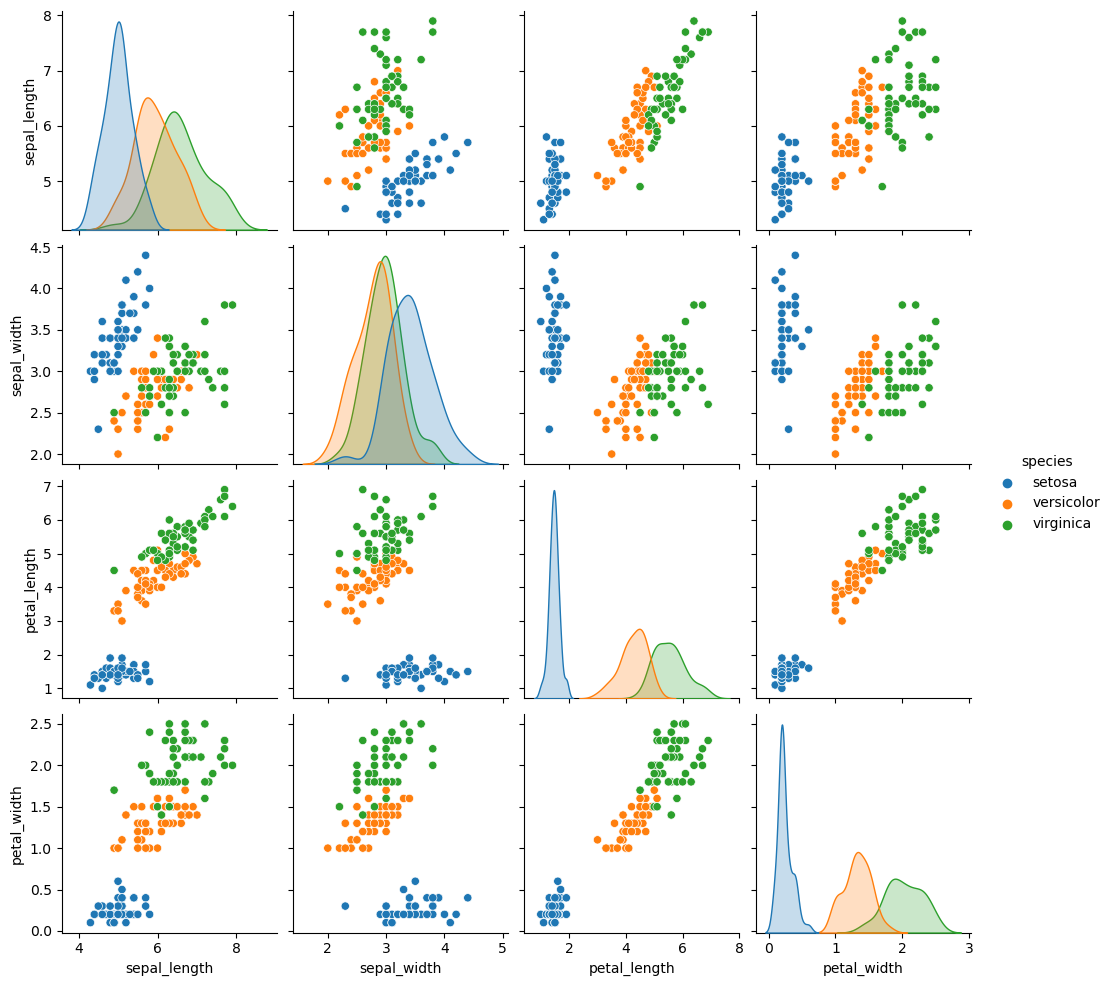

In [28]:
# use plotting to look for differences between the species
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(df, hue="species");

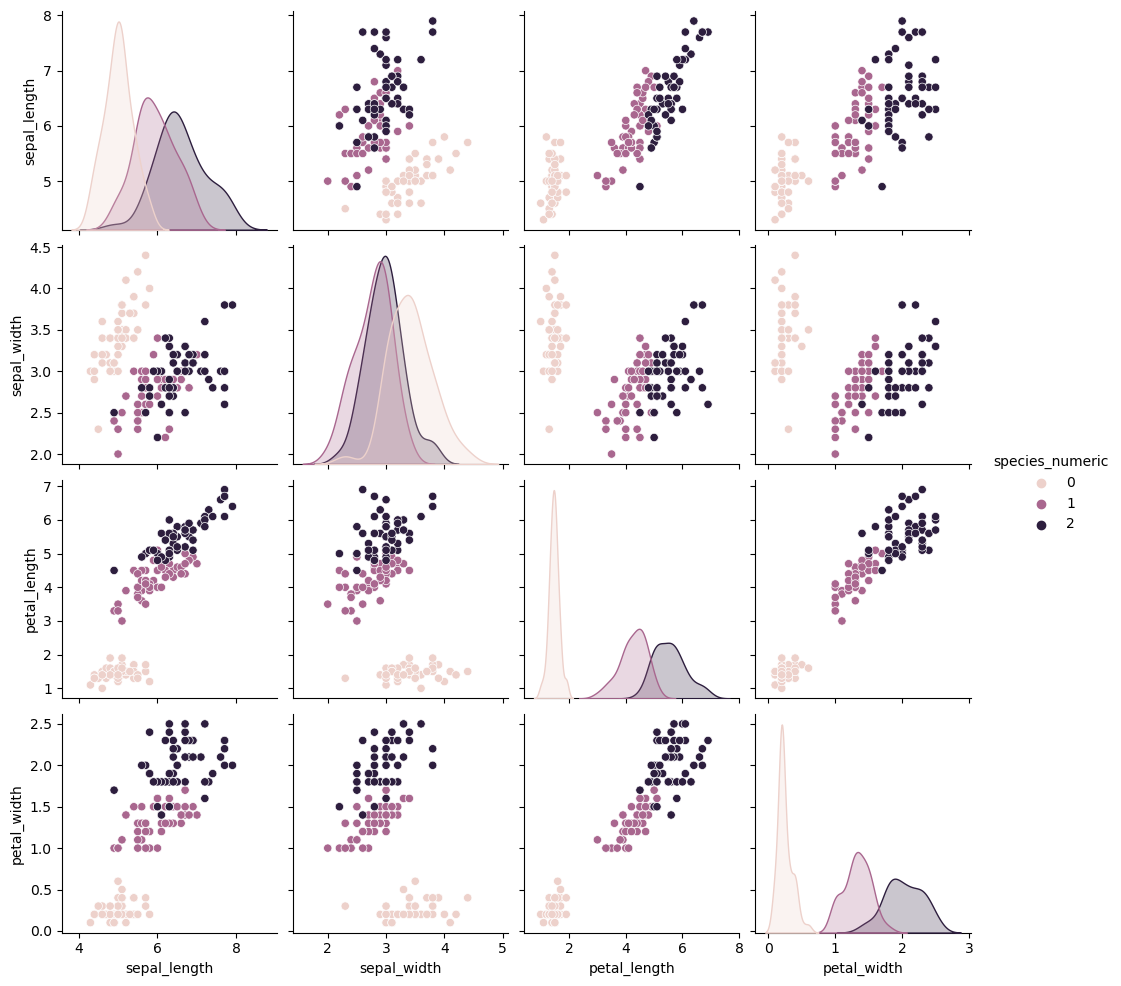

In [30]:
# map species to a numeric value so that plots can be colored by category
d =  {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['species_numeric'] = df['species'].map(d)

sns.pairplot(df, hue="species_numeric")

plt.show();


## Task 4

## Bonus

In [39]:

df.rename(columns={
    "petal_length": 'petal length (cm)',
    "sepal_length": 'sepal length (cm)',
    'sepal_width': 'sepal width (cm)',
    'petal_width': 'petal width (cm)'
}, inplace=True)

def predict_species_custom_rules(row):
   
    petal_length = row['petal length (cm)']
    sepal_length = row['sepal length (cm)']
    sepal_width = row['sepal width (cm)']
    petal_width = row['petal width (cm)']

    if petal_length < 1.9 or sepal_length < 4.9 or sepal_width > 3.8 or petal_width < 0.6:
        return 'setosa'
    elif petal_length > 5.1 or sepal_length > 7 or petal_width > 1.8:
        return 'virginica'
    else:
        return 'versicolor'  # Default to versicolor if none of the above conditions are met

# Apply the corrected function
df['predicted_species_custom'] = df.apply(predict_species_custom_rules, axis=1)

# Display the first few rows to verify custom predictions
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_numeric,predicted_species_custom
0,5.1,3.5,1.4,0.2,setosa,0,setosa
1,4.9,3.0,1.4,0.2,setosa,0,setosa
2,4.7,3.2,1.3,0.2,setosa,0,setosa
3,4.6,3.1,1.5,0.2,setosa,0,setosa
4,5.0,3.6,1.4,0.2,setosa,0,setosa
